# Exploratory data analysis

In [10]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [39]:
#!wget https://www.dropbox.com/s/oj0oi01uw1i7fht/train_data.csv

In [38]:
data=pd.read_csv('/content/train_data.csv')

# Numerical features analysis

In [8]:
train_data.describe()

,accommodates,bathrooms,cleaning_fee,number_of_reviews,bedrooms,beds,log_price,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,hot_tub_sauna_or_pool,internet,pets_allowed,secure,host_days_active
count,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000,49872.000000
mean,3.158686,1.234851,0.732455,21.002005,1.266823,1.711702,4.781950,0.255895,0.744726,0.006416,0.008462,0.016643,0.001965,0.056264,0.111987,0.722449,0.047842,0.052875,0.597369,0.233217,0.100798,0.498637,0.320761,0.128128,0.965873,0.235984,0.154335,1722.944919
std,2.166396,0.581863,0.442683,38.136676,0.853867,1.259886,0.717196,0.436368,0.436019,0.079846,0.091598,0.127929,0.044286,0.230433,0.315353,0.447795,0.213435,0.223787,0.490433,0.422883,0.301064,0.500003,0.466774,0.334236,0.181558,0.424617,0.361273,660.897459
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,552.000000
25%,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1205.000000
50%,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000,4.709530,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1654.000000
75%,4.000000,1.000000,1.000000,24.000000,1.000000,2.000000,5.220356,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2180.000000
max,16.000000,8.000000,1.000000,605.000000,10.000000,16.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4053.000000


* Number of people accommodated, bathrooms, bedrooms and beds

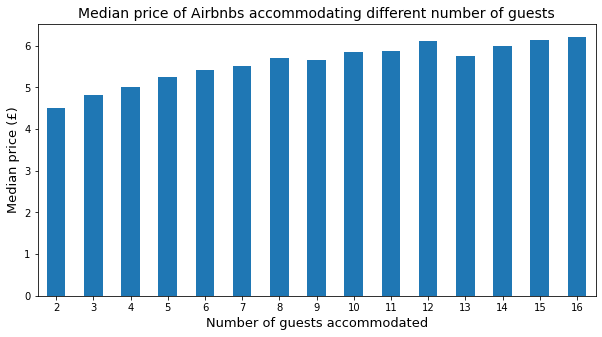

In [17]:
plt.figure(figsize=(10,5))
train_data.groupby('accommodates').log_price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

properties that accommodate more people achieve noticeably higher nightly rates, with diminishing returns coming after about 6 people.

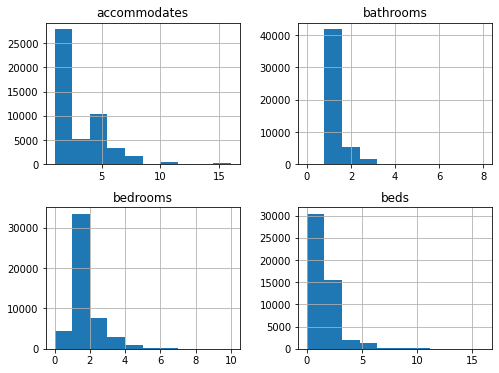

In [18]:
train_data[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

# Categorical features

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.

Property and room types

In [22]:
# finding most common property and room types
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    train_data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

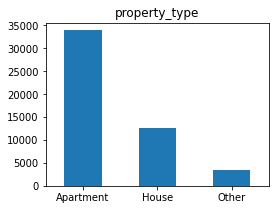

Apartment    0.678718
House        0.253870
Other        0.067413
Name: property_type, dtype: float64


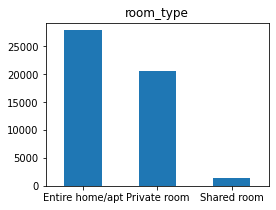

Entire home/apt    0.558269
Private room       0.412937
Shared room        0.028794
Name: room_type, dtype: float64


In [23]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(train_data[col].value_counts(normalize=True))

about 70% of properties are apartments. The remainder are houses or more uncommon property types.

# Reviews

distribution of reviews

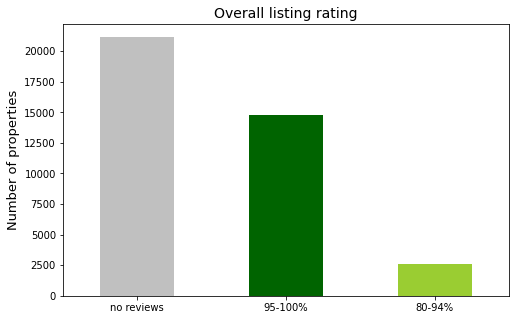

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
train_data['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

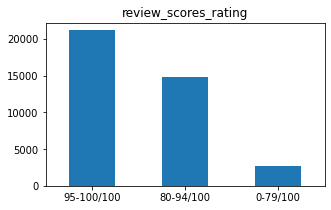

In [25]:
for col in list(train_data.columns[train_data.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

for every review category, the majority of listings that have had a review have received a 10/10 rating for that category (or 95-100/100 overall) - clearly people love their Airbnbs

#First and last reviews

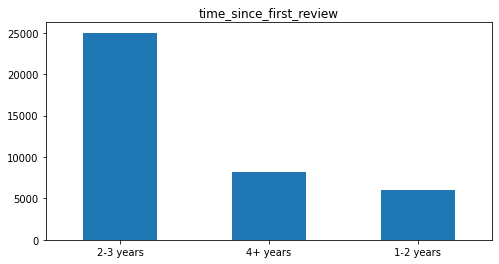

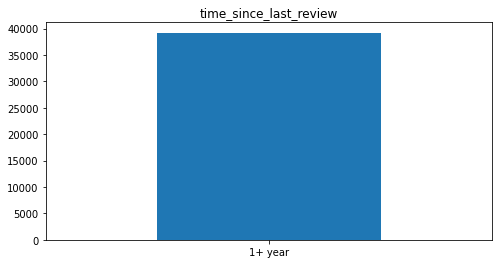

In [26]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

# Instant booking

how many properties are instant bookable (i.e. able to be booked without messaging the host first), and is it worth it?

In [30]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    train_data.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    train_data.groupby(col).log_price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()

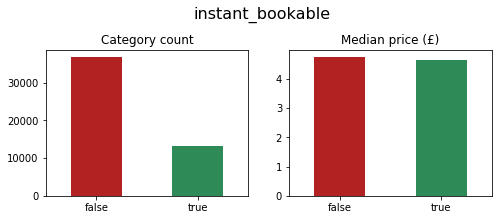

f    0.737267
t    0.262733
Name: instant_bookable, dtype: float64


In [32]:
binary_count_and_price_plot('instant_bookable')
print(train_data.instant_bookable.value_counts(normalize=True))

 only about 20% of properties are instant bookable. However, the added convenience does not seem to have any effect on the median price per night.

# Now we got an insight from above visualization. Based on this we will drop columns which are not important for finding the target column i.e log price

# Next we will go for model building process